In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
import seaborn as sns

In [2]:
df = pd.read_csv("Crashes_in_DC.csv")

/Users/kmiyaki/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,X,Y,OBJECTID,CRIMEID,CCN,REPORTDATE,ROUTEID,MEASURE,OFFSET,STREETSEGID,...,NEARESTINTROUTEID,NEARESTINTSTREETNAME,OFFINTERSECTION,INTAPPROACHDIRECTION,LOCATIONERROR,LASTUPDATEDATE,MPDLATITUDE,MPDLONGITUDE,MPDGEOX,MPDGEOY
0,-77.000676,38.846673,96413468,26609229,9173516,2009-12-05T05:00:00.000Z,13064152,533.400,0.000000,8130.0,...,13000502,5TH ST SE,22.663552,Northwest,NaN,NaN,NaN,NaN,NaN,NaN
1,-76.980768,38.885957,96413469,24512078,13040796,2013-03-30T05:00:00.000Z,13001702,37.766,0.000011,9420.0,...,13059602,MASSACHUSETTS AVE SE,0.850553,North,NaN,NaN,NaN,NaN,NaN,NaN
2,-77.033991,38.900703,96413470,25036368,14093178,2014-06-26T05:00:00.000Z,47085772,29.870,0.000000,-9.0,...,11001502,15TH ST NW,36.641899,West,NaN,NaN,38.900506,-77.033988,NaN,NaN
3,-76.928207,38.890329,96413471,27133521,16198580,2016-11-22T13:31:23.000Z,47035472,160.325,0.000000,-9.0,...,12029642,DIVISION AVE NE,26.893516,West,NaN,NaN,38.890167,-76.928204,406228.71,135816.2
4,-77.033840,38.962512,96413472,26609235,9173878,2009-12-06T05:00:00.000Z,58010042,50.597,0.000000,-9.0,...,11001402,14TH ST NW,36.089659,West,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.REPORTDATE = pd.to_datetime(df.REPORTDATE)
df.FROMDATE = pd.to_datetime(df.FROMDATE)
df.TODATE = pd.to_datetime(df.TODATE)

In [5]:
df["report_second"] = df.REPORTDATE.apply(lambda date: date.second)
df["report_minute"] = df.REPORTDATE.apply(lambda date: date.minute)
df["report_hour"] = df.REPORTDATE.apply(lambda date: date.hour)
df["report_month"] = df.REPORTDATE.apply(lambda date: date.month)
df["report_year"] = df.REPORTDATE.apply(lambda date: date.year)
df["report_day_of_week"] = df.REPORTDATE.apply(lambda date: date.dayofweek)
df["quadrant"] = df.ADDRESS.str.extract(r" ([NS][WE])\b")
df["ward"] = df.WARD.str.extract(r"([1-8])")

In [6]:
df.ward.value_counts()

2    47618
5    31337
6    30614
7    25606
8    21899
1    18662
4    18160
3    13435
Name: ward, dtype: int64

In [7]:
df.columns

Index(['X', 'Y', 'OBJECTID', 'CRIMEID', 'CCN', 'REPORTDATE', 'ROUTEID',
       'MEASURE', 'OFFSET', 'STREETSEGID', 'ROADWAYSEGID', 'FROMDATE',
       'TODATE', 'MARID', 'ADDRESS', 'LATITUDE', 'LONGITUDE', 'XCOORD',
       'YCOORD', 'WARD', 'EVENTID', 'MAR_ADDRESS', 'MAR_SCORE',
       'MAJORINJURIES_BICYCLIST', 'MINORINJURIES_BICYCLIST',
       'UNKNOWNINJURIES_BICYCLIST', 'FATAL_BICYCLIST', 'MAJORINJURIES_DRIVER',
       'MINORINJURIES_DRIVER', 'UNKNOWNINJURIES_DRIVER', 'FATAL_DRIVER',
       'MAJORINJURIES_PEDESTRIAN', 'MINORINJURIES_PEDESTRIAN',
       'UNKNOWNINJURIES_PEDESTRIAN', 'FATAL_PEDESTRIAN', 'TOTAL_VEHICLES',
       'TOTAL_BICYCLES', 'TOTAL_PEDESTRIANS', 'PEDESTRIANSIMPAIRED',
       'BICYCLISTSIMPAIRED', 'DRIVERSIMPAIRED', 'TOTAL_TAXIS',
       'TOTAL_GOVERNMENT', 'SPEEDING_INVOLVED', 'NEARESTINTROUTEID',
       'NEARESTINTSTREETNAME', 'OFFINTERSECTION', 'INTAPPROACHDIRECTION',
       'LOCATIONERROR', 'LASTUPDATEDATE', 'MPDLATITUDE', 'MPDLONGITUDE',
       'MPDGEOX', 'MPD

In [8]:
df.head().T

,0,1,2,3,4
X,-77.0007,-76.9808,-77.034,-76.9282,-77.0338
Y,38.8467,38.886,38.9007,38.8903,38.9625
OBJECTID,96413468,96413469,96413470,96413471,96413472
CRIMEID,26609229,24512078,25036368,27133521,26609235
CCN,9173516,13040796,14093178,16198580,9173878
REPORTDATE,2009-12-05 05:00:00+00:00,2013-03-30 05:00:00+00:00,2014-06-26 05:00:00+00:00,2016-11-22 13:31:23+00:00,2009-12-06 05:00:00+00:00
ROUTEID,13064152,13001702,47085772,47035472,58010042
MEASURE,533.4,37.766,29.87,160.325,50.597
OFFSET,0,1.1e-05,0,0,0
STREETSEGID,8130,9420,-9,-9,-9


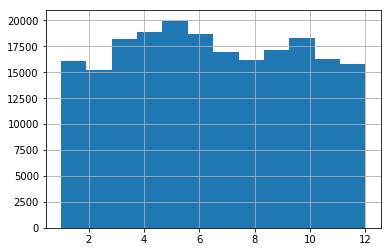

In [9]:
df.report_month.hist(bins=12)
plt.show()

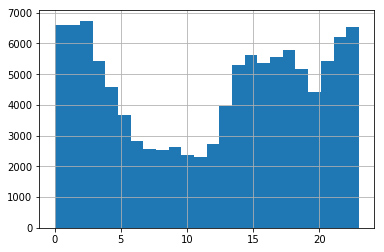

In [10]:
df_except_five_oclock = df.loc[~((df.report_hour==5) & (df.report_minute==0) & (df.report_second==0))]
df_except_five_oclock.report_hour.hist(bins=24)
plt.show()

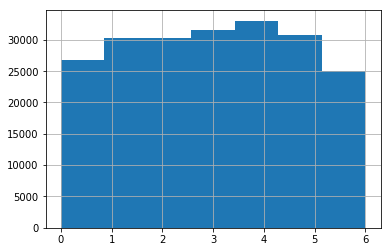

In [32]:
day_of_week = {0:"Monday", 1:"Tuesday", 2:"Wednesday", 3:"Thursday", 4:"Friday", 5:"Saturday", 6:"Sunday"}
df.report_day_of_week.hist(bins=7)
plt.show()

In [12]:
df.quadrant.value_counts()

NW    100595
NE     49917
SE     38212
SW      6453
Name: quadrant, dtype: int64

In [13]:
df.groupby("quadrant")[["X", "Y"]].agg(["max","min"])

X                     Y           
                max        min        max        min
quadrant                                            
NE       -76.909534 -77.078423  38.970394  38.824838
NW       -76.939845 -77.116031  38.994753  38.831741
SE       -76.911148 -77.083016  38.962804  38.818379
SW       -76.947165 -77.055360  38.955491  38.808889

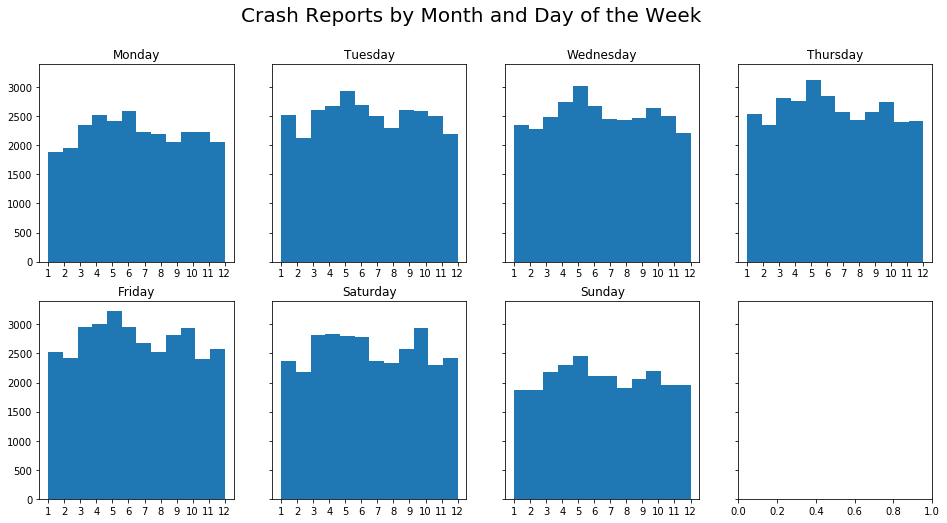

In [14]:
fig, ax = plt.subplots(2,4, sharey=True, figsize=(16,8))
fig.suptitle("Crash Reports by Month and Day of the Week", fontsize=20)
for i in range(7):
    row = int(i/4)
    col = i%4
    ax[row, col].hist(df.loc[df.report_day_of_week==i,"report_month"], bins=12)
    ax[row, col].title.set_text(day_of_week[i])
    ax[row, col].set_xticks(range(1,13))

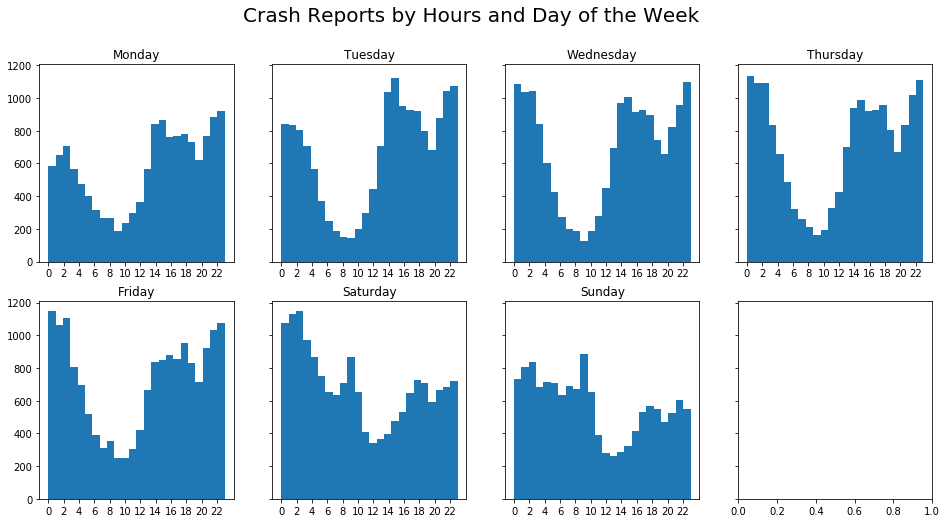

In [15]:
fig, ax = plt.subplots(2,4, sharey=True, figsize=(16,8))
fig.suptitle("Crash Reports by Hours and Day of the Week", fontsize=20)
for i in range(7):
    row = int(i/4)
    col = i%4
    ax[row, col].hist(df_except_five_oclock.loc[df_except_five_oclock.report_day_of_week==i,"report_hour"], bins=24)
    ax[row, col].title.set_text(day_of_week[i])
    ax[row, col].set_xticks(range(0, 24, 2))

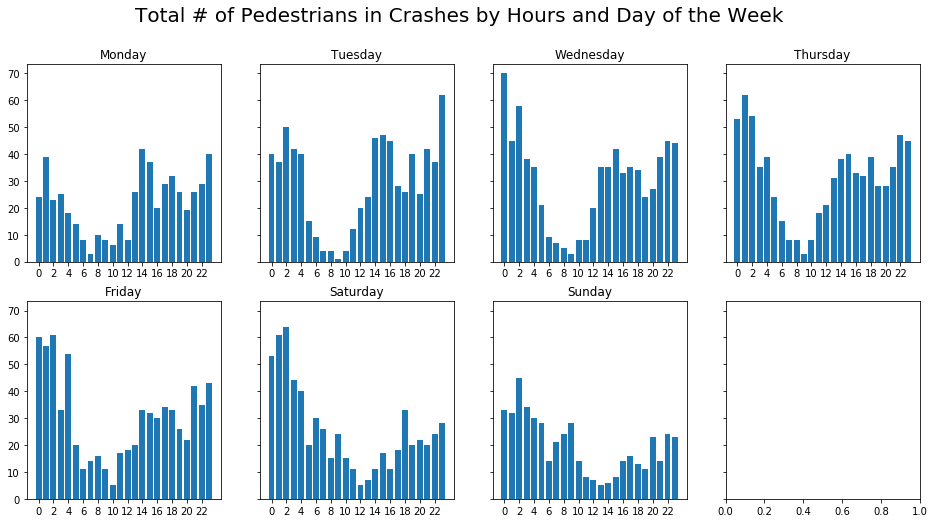

In [16]:
pivot = pd.pivot_table(df_except_five_oclock, index="report_hour", columns="report_day_of_week", values="TOTAL_PEDESTRIANS", aggfunc=np.sum)
fig, ax = plt.subplots(2,4, sharey=True, figsize=(16,8))
fig.suptitle("Total # of Pedestrians in Crashes by Hours and Day of the Week", fontsize=20)
for i in range(7):
    row = int(i/4)
    col = i%4
    ax[row, col].bar(pivot.index, pivot.loc[:,i])
    ax[row, col].title.set_text(day_of_week[i])
    ax[row, col].set_xticks(range(0, 24, 2))

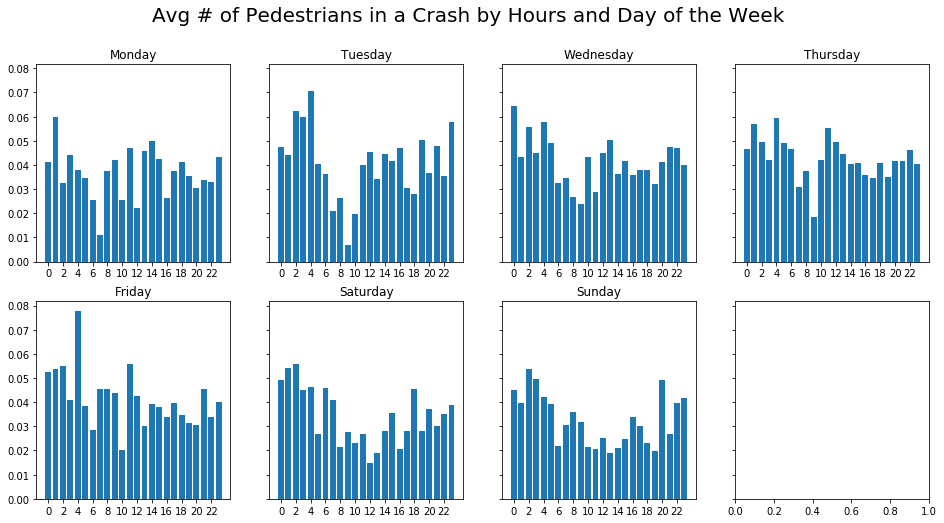

In [17]:
pivot = pd.pivot_table(df_except_five_oclock, index="report_hour", columns="report_day_of_week", values="TOTAL_PEDESTRIANS", aggfunc=np.mean)
fig, ax = plt.subplots(2,4, sharey=True, figsize=(16,8))
fig.suptitle("Avg # of Pedestrians in a Crash by Hours and Day of the Week", fontsize=20)
for i in range(7):
    row = int(i/4)
    col = i%4
    ax[row, col].bar(pivot.index, pivot.loc[:,i])
    ax[row, col].title.set_text(day_of_week[i])
    ax[row, col].set_xticks(range(0, 24, 2))

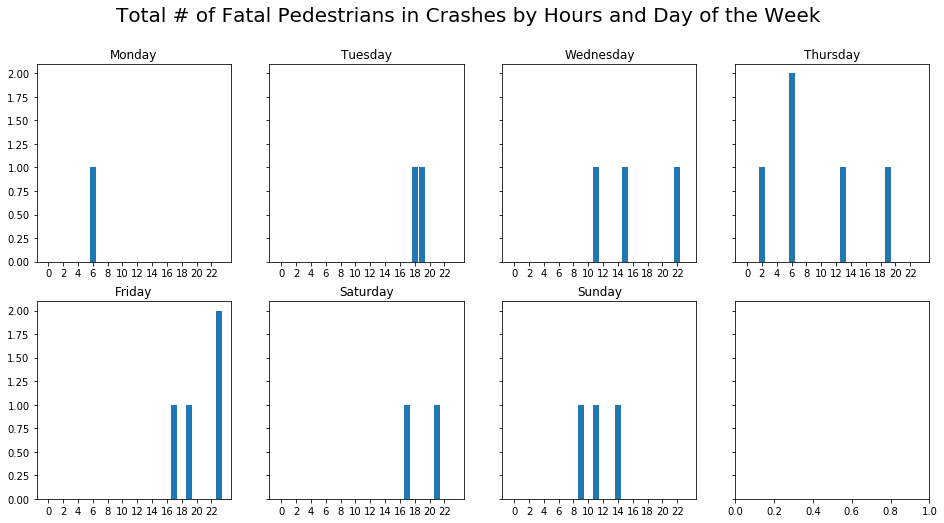

In [18]:
pivot = pd.pivot_table(df_except_five_oclock, index="report_hour", columns="report_day_of_week", values="FATAL_PEDESTRIAN", aggfunc=np.sum)
fig, ax = plt.subplots(2,4, sharey=True, figsize=(16,8))
fig.suptitle("Total # of Fatal Pedestrians in Crashes by Hours and Day of the Week", fontsize=20)
for i in range(7):
    row = int(i/4)
    col = i%4
    ax[row, col].bar(pivot.index, pivot.loc[:,i])
    ax[row, col].title.set_text(day_of_week[i])
    ax[row, col].set_xticks(range(0, 24, 2))

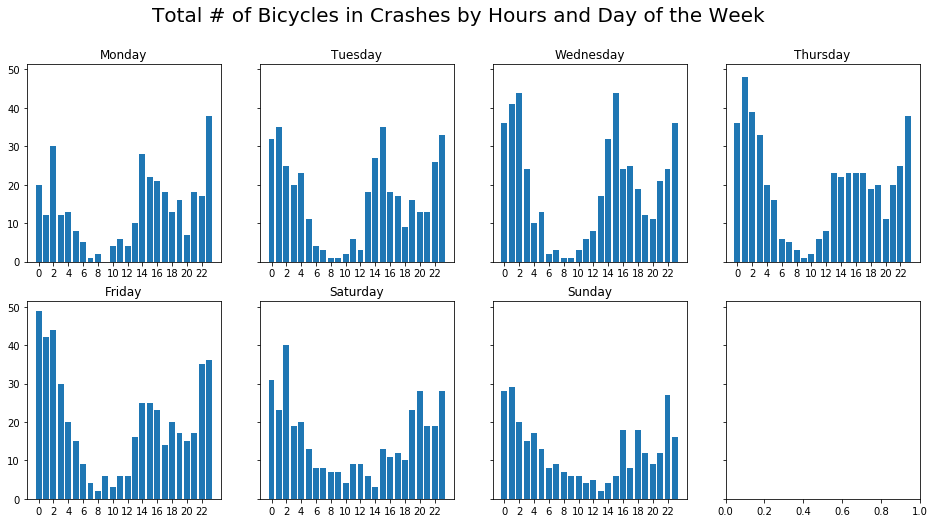

In [19]:
pivot = pd.pivot_table(df_except_five_oclock, index="report_hour", columns="report_day_of_week", values="TOTAL_BICYCLES", aggfunc=np.sum)
fig, ax = plt.subplots(2,4, sharey=True, figsize=(16,8))
fig.suptitle("Total # of Bicycles in Crashes by Hours and Day of the Week", fontsize=20)
for i in range(7):
    row = int(i/4)
    col = i%4
    ax[row, col].bar(pivot.index, pivot.loc[:,i])
    ax[row, col].title.set_text(day_of_week[i])
    ax[row, col].set_xticks(range(0, 24, 2))

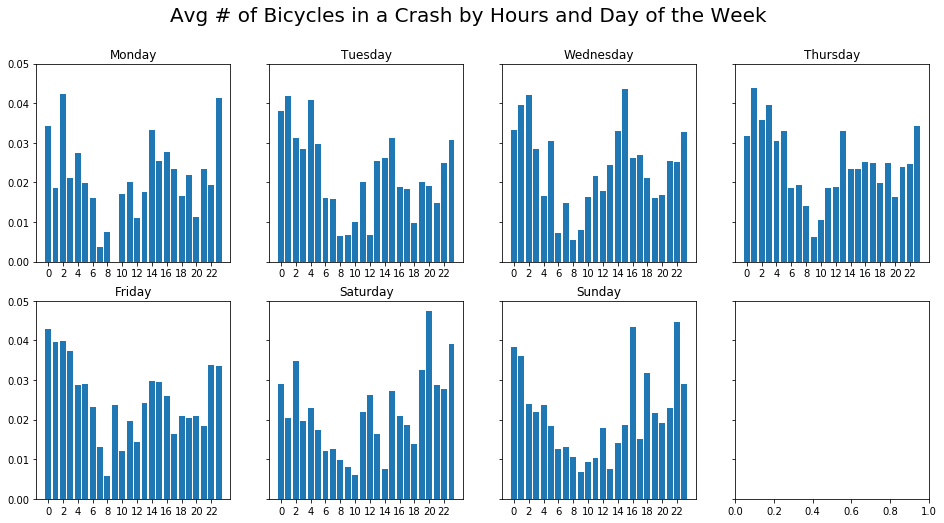

In [20]:
pivot = pd.pivot_table(df_except_five_oclock, index="report_hour", columns="report_day_of_week", values="TOTAL_BICYCLES", aggfunc=np.mean)
fig, ax = plt.subplots(2,4, sharey=True, figsize=(16,8))
fig.suptitle("Avg # of Bicycles in a Crash by Hours and Day of the Week", fontsize=20)
for i in range(7):
    row = int(i/4)
    col = i%4
    ax[row, col].bar(pivot.index, pivot.loc[:,i])
    ax[row, col].title.set_text(day_of_week[i])
    ax[row, col].set_xticks(range(0, 24, 2))

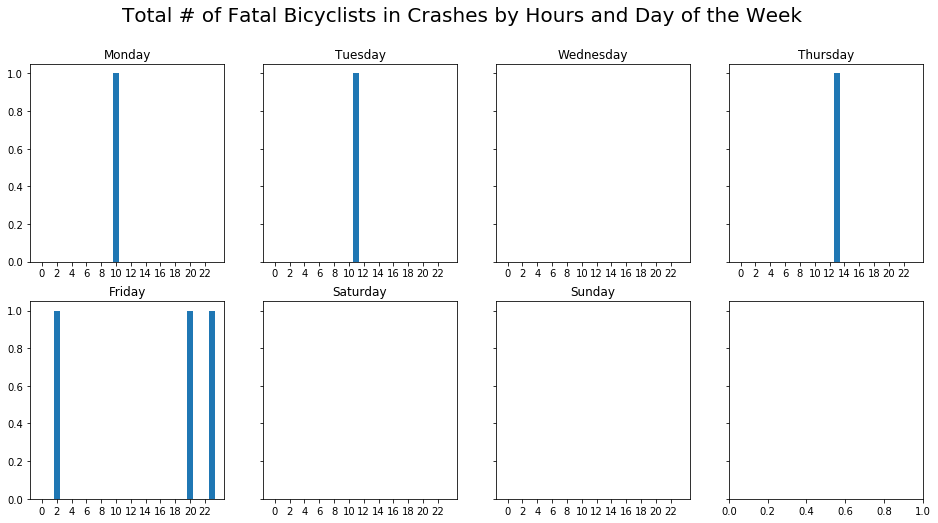

In [21]:
pivot = pd.pivot_table(df_except_five_oclock, index="report_hour", columns="report_day_of_week", values="FATAL_BICYCLIST", aggfunc=np.sum)
fig, ax = plt.subplots(2,4, sharey=True, figsize=(16,8))
fig.suptitle("Total # of Fatal Bicyclists in Crashes by Hours and Day of the Week", fontsize=20)
for i in range(7):
    row = int(i/4)
    col = i%4
    ax[row, col].bar(pivot.index, pivot.loc[:,i])
    ax[row, col].title.set_text(day_of_week[i])
    ax[row, col].set_xticks(range(0, 24, 2))

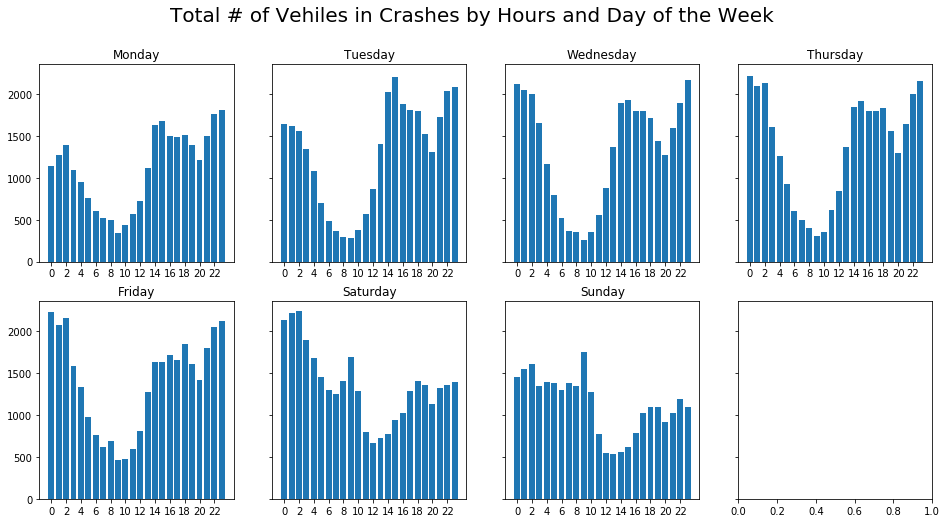

In [22]:
pivot = pd.pivot_table(df_except_five_oclock, index="report_hour", columns="report_day_of_week", values="TOTAL_VEHICLES", aggfunc=np.sum)
fig, ax = plt.subplots(2,4, sharey=True, figsize=(16,8))
fig.suptitle("Total # of Vehiles in Crashes by Hours and Day of the Week", fontsize=20)
for i in range(7):
    row = int(i/4)
    col = i%4
    ax[row, col].bar(pivot.index, pivot.loc[:,i])
    ax[row, col].title.set_text(day_of_week[i])
    ax[row, col].set_xticks(range(0, 24, 2))

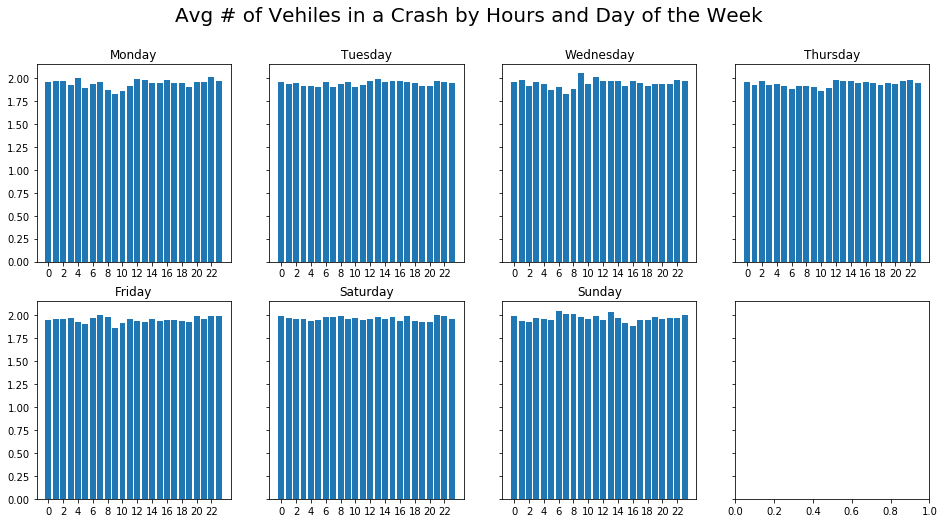

In [23]:
pivot = pd.pivot_table(df_except_five_oclock, index="report_hour", columns="report_day_of_week", values="TOTAL_VEHICLES", aggfunc=np.mean)
fig, ax = plt.subplots(2,4, sharey=True, figsize=(16,8))
fig.suptitle("Avg # of Vehiles in a Crash by Hours and Day of the Week", fontsize=20)
for i in range(7):
    row = int(i/4)
    col = i%4
    ax[row, col].bar(pivot.index, pivot.loc[:,i])
    ax[row, col].title.set_text(day_of_week[i])
    ax[row, col].set_xticks(range(0, 24, 2))

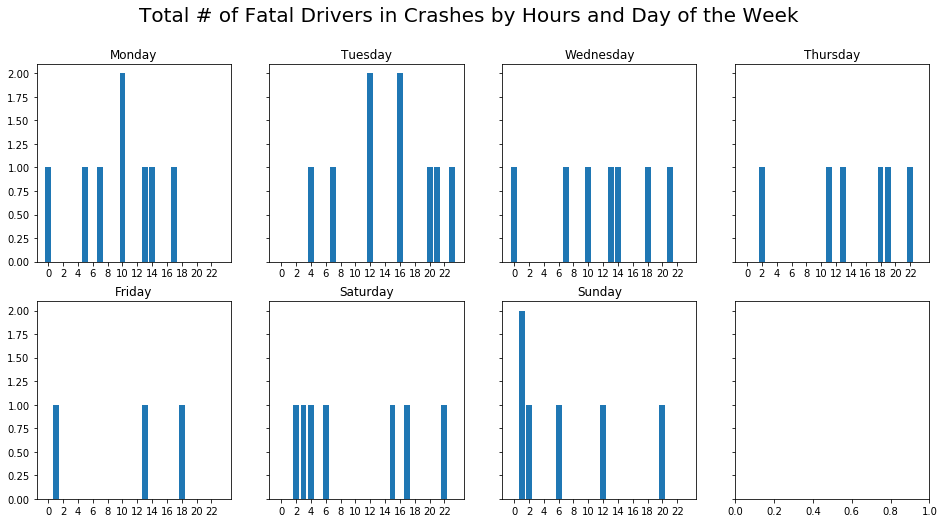

In [24]:
pivot = pd.pivot_table(df_except_five_oclock, index="report_hour", columns="report_day_of_week", values="FATAL_DRIVER", aggfunc=np.sum)
fig, ax = plt.subplots(2,4, sharey=True, figsize=(16,8))
fig.suptitle("Total # of Fatal Drivers in Crashes by Hours and Day of the Week", fontsize=20)
for i in range(7):
    row = int(i/4)
    col = i%4
    ax[row, col].bar(pivot.index, pivot.loc[:,i])
    ax[row, col].title.set_text(day_of_week[i])
    ax[row, col].set_xticks(range(0, 24, 2))

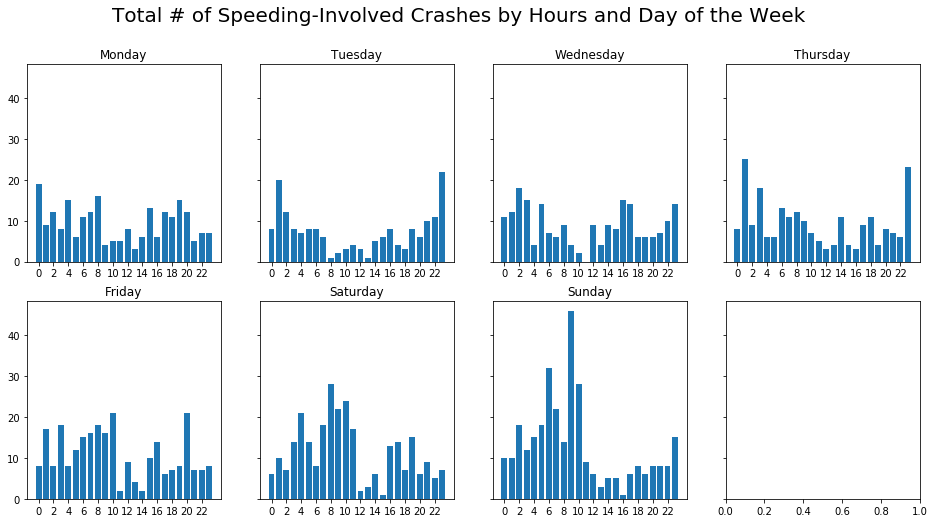

In [25]:
pivot = pd.pivot_table(df_except_five_oclock, index="report_hour", columns="report_day_of_week", values="SPEEDING_INVOLVED", aggfunc=np.sum)
fig, ax = plt.subplots(2,4, sharey=True, figsize=(16,8))
fig.suptitle("Total # of Speeding-Involved Crashes by Hours and Day of the Week", fontsize=20)
for i in range(7):
    row = int(i/4)
    col = i%4
    ax[row, col].bar(pivot.index, pivot.loc[:,i])
    ax[row, col].title.set_text(day_of_week[i])
    ax[row, col].set_xticks(range(0, 24, 2))

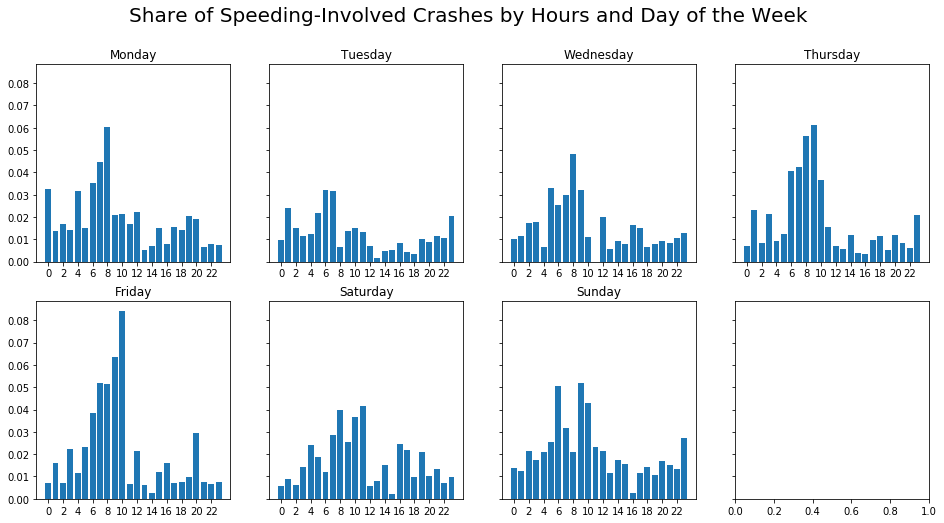

In [26]:
pivot = pd.pivot_table(df_except_five_oclock, index="report_hour", columns="report_day_of_week", values="SPEEDING_INVOLVED", aggfunc=np.mean)
fig, ax = plt.subplots(2,4, sharey=True, figsize=(16,8))
fig.suptitle("Share of Speeding-Involved Crashes by Hours and Day of the Week", fontsize=20)
for i in range(7):
    row = int(i/4)
    col = i%4
    ax[row, col].bar(pivot.index, pivot.loc[:,i])
    ax[row, col].title.set_text(day_of_week[i])
    ax[row, col].set_xticks(range(0, 24, 2))

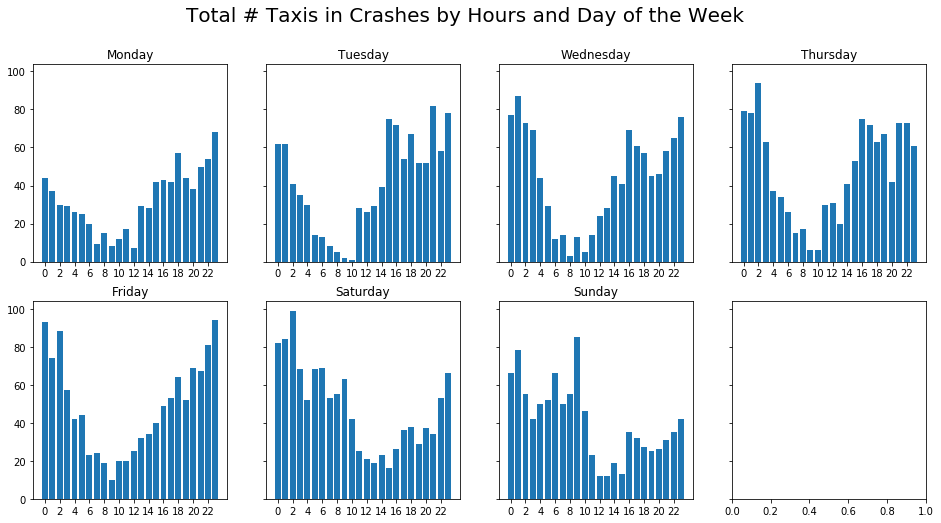

In [27]:
pivot = pd.pivot_table(df_except_five_oclock, index="report_hour", columns="report_day_of_week", values="TOTAL_TAXIS", aggfunc=np.sum)
fig, ax = plt.subplots(2,4, sharey=True, figsize=(16,8))
fig.suptitle("Total # Taxis in Crashes by Hours and Day of the Week", fontsize=20)
for i in range(7):
    row = int(i/4)
    col = i%4
    ax[row, col].bar(pivot.index, pivot.loc[:,i])
    ax[row, col].title.set_text(day_of_week[i])
    ax[row, col].set_xticks(range(0, 24, 2))

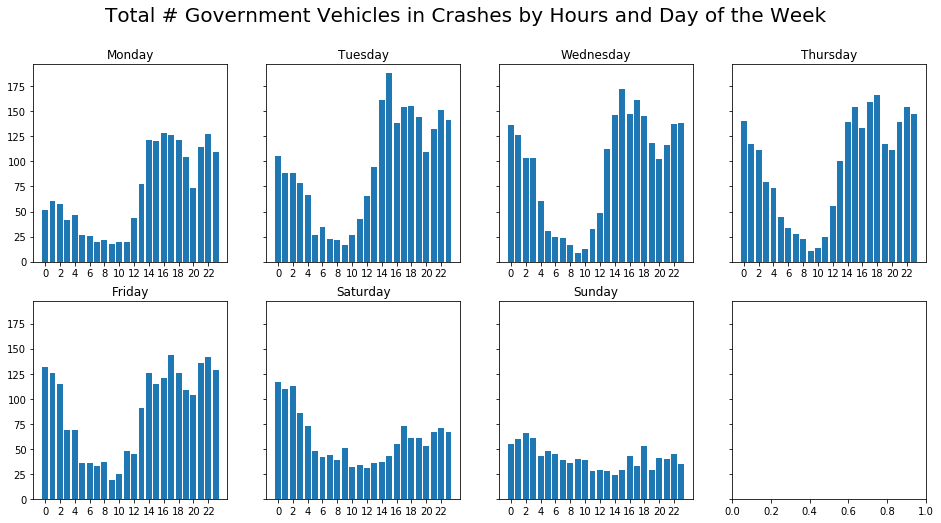

In [28]:
pivot = pd.pivot_table(df_except_five_oclock, index="report_hour", columns="report_day_of_week", values="TOTAL_GOVERNMENT", aggfunc=np.sum)
fig, ax = plt.subplots(2,4, sharey=True, figsize=(16,8))
fig.suptitle("Total # Government Vehicles in Crashes by Hours and Day of the Week", fontsize=20)
for i in range(7):
    row = int(i/4)
    col = i%4
    ax[row, col].bar(pivot.index, pivot.loc[:,i])
    ax[row, col].title.set_text(day_of_week[i])
    ax[row, col].set_xticks(range(0, 24, 2))